In [222]:
import pandas as pd

In [223]:
df = pd.read_csv('Stocks/GOOG.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# df = pd.read_csv('Stocks/TestAnomaly.csv')
# df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [224]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-22,61.799500,62.454498,61.415501,62.442001,62.442001,16146000
1,2019-04-23,62.534500,63.450001,62.319000,63.227501,63.227501,26398000
2,2019-04-24,63.206001,63.400501,62.750000,62.799999,62.799999,20376000
3,2019-04-25,63.238499,63.370399,62.601501,63.172501,63.172501,22146000
4,2019-04-26,63.450001,63.653500,63.015999,63.609001,63.609001,24828000
5,2019-04-29,63.700001,64.463501,63.314751,64.378998,64.378998,49988000
6,2019-04-30,59.250000,59.640499,58.750000,59.424000,59.424000,124140000
7,2019-05-01,59.402500,59.402500,58.359001,58.403999,58.403999,52784000
8,2019-05-02,58.388000,58.709499,57.750099,58.130501,58.130501,38896000
9,2019-05-03,58.682499,59.340000,58.450001,59.270000,59.270000,39614000


In [225]:
# df = df.head(1000)

In [226]:
r = pd.date_range(start=df.Date.min(), end=df.Date.max())
df = df.set_index('Date').reindex(r).fillna(0).rename_axis('Date').reset_index().dropna()


In [227]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').asfreq('D').dropna()

In [228]:
df = df[['Close']]
# To fill the weekend and holiday gaps in the data to apply multiplicative model
df['Close'] = df['Close'].replace(to_replace=0, method='ffill')

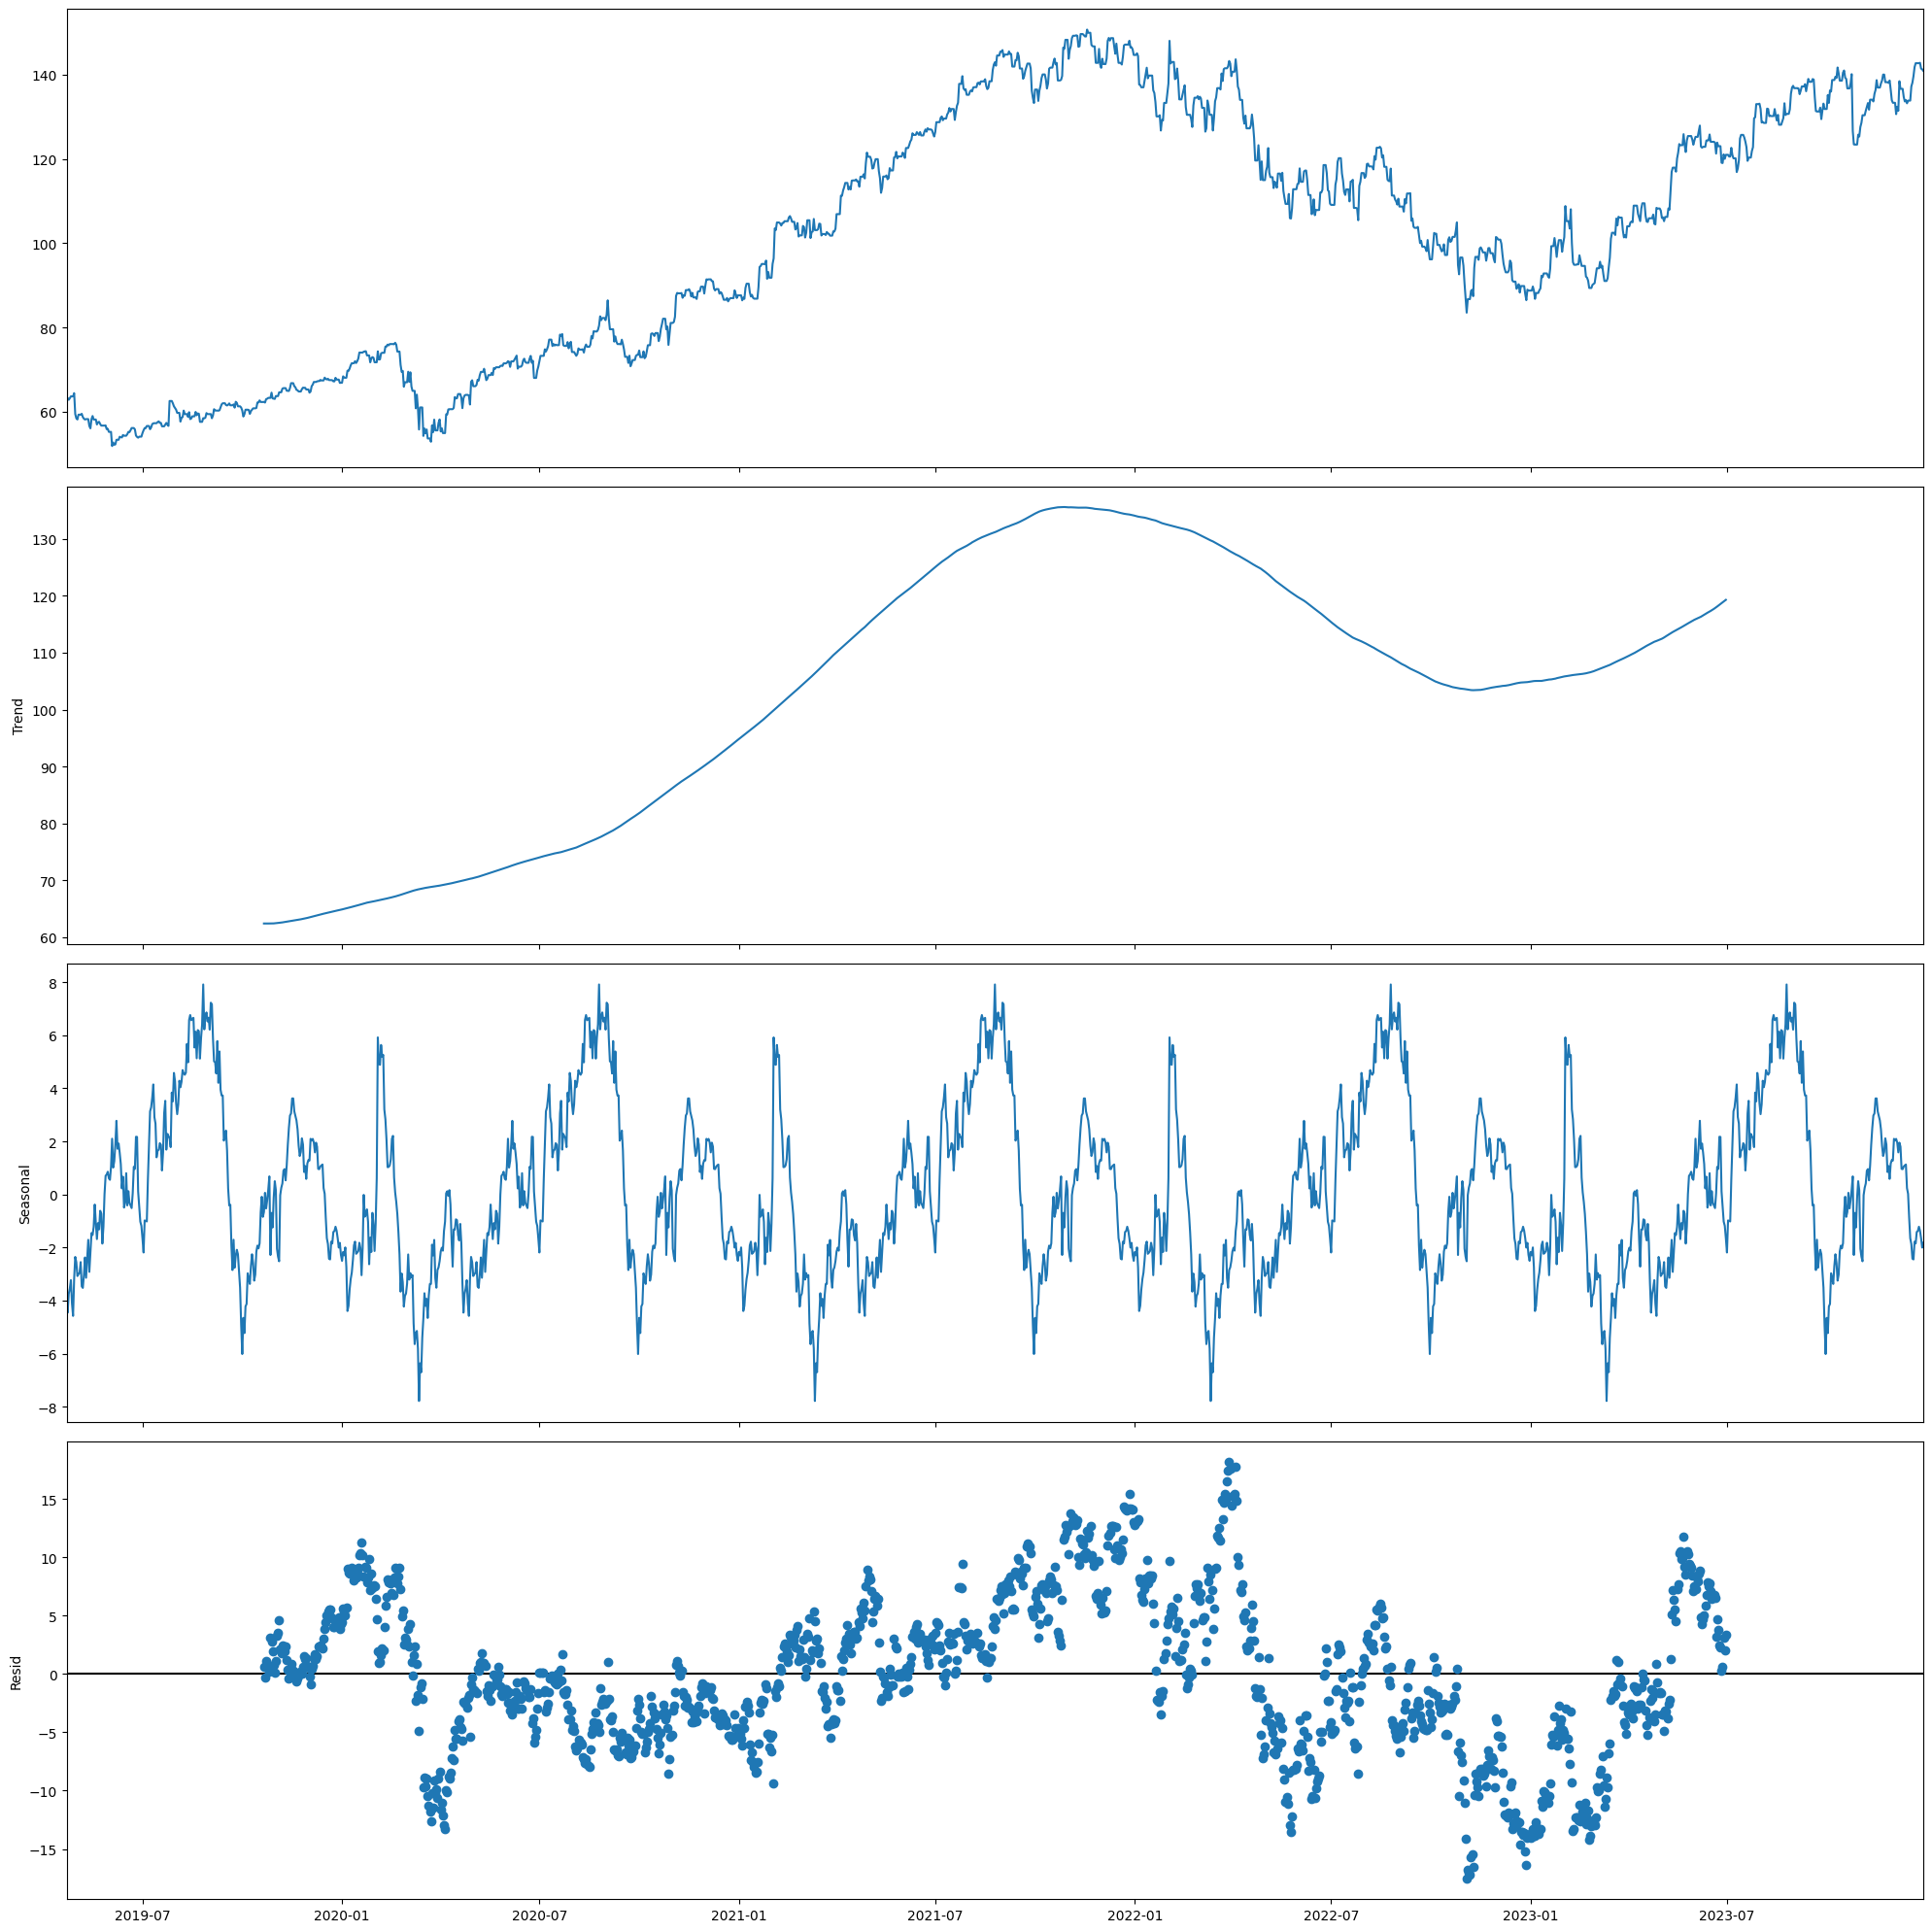

In [244]:
import matplotlib.pyplot as plt
plt.rc("figure",figsize=(20,20))
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=365)
result.plot()
plt.show()

In [230]:
# Missing value treatment
# trend = result.trend.dropna()
# seasonal = result.seasonal.dropna()
# residual = result.resid.dropna()
trend = result.trend.interpolate()
seasonal = result.seasonal.interpolate()
residual = result.resid.interpolate()

In [231]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Prepare the dataset for LSTM
# Normalize each component separately
scaler_trend = MinMaxScaler(feature_range=(0, 1))
trend_scaled = scaler_trend.fit_transform(trend.values.reshape(-1, 1))

scaler_seasonal = MinMaxScaler(feature_range=(0, 1))
seasonal_scaled = scaler_seasonal.fit_transform(seasonal.values.reshape(-1, 1))

scaler_residual = MinMaxScaler(feature_range=(0, 1))
residual_scaled = scaler_residual.fit_transform(residual.values.reshape(-1, 1))

# Combine the scaled components into a single feature set
combined_scaled = np.hstack((trend_scaled, seasonal_scaled, residual_scaled))

In [232]:
print(combined_scaled.shape)
print(trend_scaled.shape)
print(seasonal_scaled.shape)
print(residual_scaled.shape)

(1713, 3)
(1713, 1)
(1713, 1)
(1713, 1)
